**Breast 'malignant', 'benign' & 'normal' clasification**





*   Objective : Clasify the breast images as 'malignant', 'benign' & 'normal'
*   3 class clasification





*   Data set : Breast Ultrasound Images Dataset
*   Data source : https://www.kaggle.com/aryashah2k/breast-ultrasound-images-dataset

Data Preparation:

*   Cleaned the data set (removed all mask images)

*   Copied Data set to google drive

*   Mounted google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/BreastCancer_Images_2.zip

Archive:  /content/drive/MyDrive/BreastCancer_Images_2.zip
   creating: BreastCancer_Images_2/
   creating: BreastCancer_Images_2/Test/
   creating: BreastCancer_Images_2/Test/benign/
  inflating: BreastCancer_Images_2/Test/benign/benign (418).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (419).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (420).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (421).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (422).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (423).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (424).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (425).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (426).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (427).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (428).png  
  inflating: BreastCancer_Images_2/Test/benign/benign (429).png  
  inflating: BreastCance

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical,plot_model

Sample image view

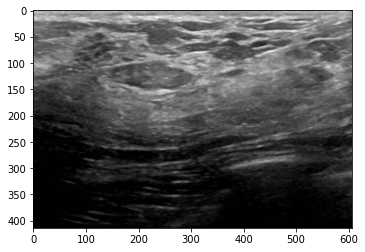

In [4]:
img = cv2.imread(r"/content/BreastCancer_Images_2/Test/benign/benign (418).png")
plt.imshow(img)
plt.show()

In [5]:
# create a data generator object for train and test to load data
batch_size=32

In [6]:
traindatagen = image.ImageDataGenerator(rescale=1./255.,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        zoom_range=0.25,
                                        shear_range=0.45)

train_generator = traindatagen.flow_from_directory("/content/BreastCancer_Images_2/Train",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='categorical')
# the class mode for two class classification should be "binary" and for multiclass classification it should be "categorical"

Found 720 images belonging to 3 classes.


In [7]:
testdatagen = image.ImageDataGenerator(rescale=1./255.)
test_generator = testdatagen.flow_from_directory("/content/BreastCancer_Images_2/Test",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 60 images belonging to 3 classes.


In [8]:
xtrain,ytrain = train_generator.next()
print(xtrain.shape)
print(ytrain.shape)

(32, 200, 200, 3)
(32, 3)


In [9]:
ytrain

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [10]:
# To check categories are represented by which binary values
train_generator.class_indices 

{'benign': 0, 'malignant': 1, 'normal': 2}

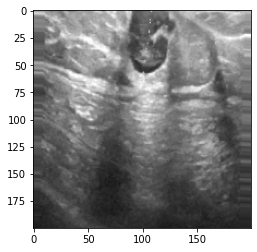

In [11]:
plt.imshow(xtrain[8])
plt.show()

Build architecture with Conolution (Filter, Max pool, relu)
Flatten the ouput & connect to FCNN

In [54]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Conv2D(filters=30,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
model.add(layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=70,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=80,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

### ------------ shifting to flatten layer --------------
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(3,activation='softmax'))

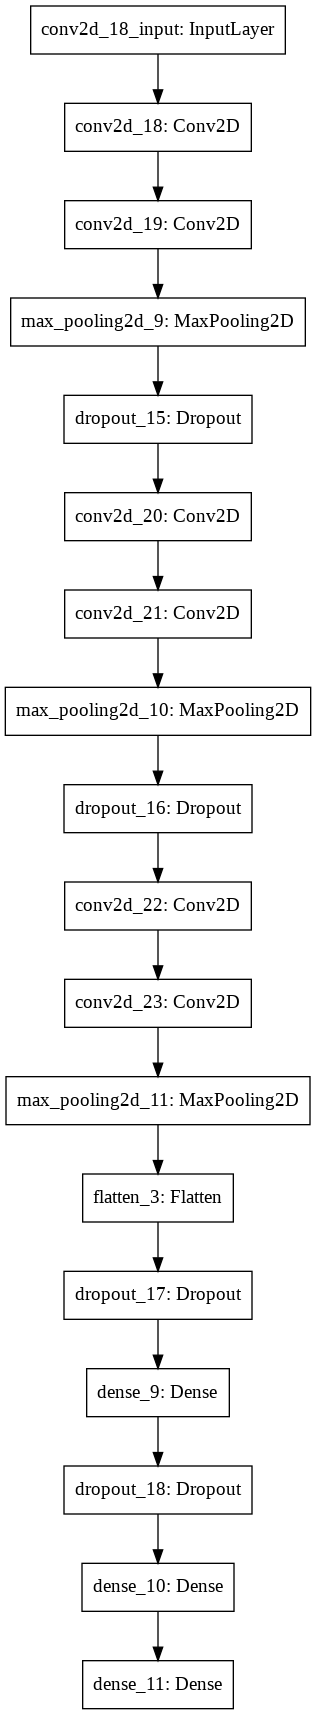

In [55]:
plot_model(model)

Build model

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

#model.fit(x=None, y=None, batch_size=None, epochs=30, verbose='auto', callbacks=None,
         # validation_split=0.0, validation_data=None, shuffle=True, 
         # class_weight=None, sample_weight=None, initial_epoch=0, 
         # steps_per_epoch=None, validation_steps=None, validation_batch_size=None, 
         # validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 30)      840       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 196, 196, 40)      10840     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 40)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 98, 98, 40)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 50)        18050     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 94, 94, 60)        27060     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 60)       

In [57]:

#model.fit_generator(train_generator,epochs=30,validation_data=test_generator)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model.fit(train_generator,validation_data=test_generator,epochs=40,verbose=1,callbacks=[early_stopping])


Epoch 1/40
23/23 [==============================] - 12s 483ms/step - loss: 1.0530 - accuracy: 0.5458 - val_loss: 1.1672 - val_accuracy: 0.3333
Epoch 2/40
23/23 [==============================] - 11s 459ms/step - loss: 0.9467 - accuracy: 0.5792 - val_loss: 1.1075 - val_accuracy: 0.3333
Epoch 3/40
23/23 [==============================] - 11s 464ms/step - loss: 0.9385 - accuracy: 0.6097 - val_loss: 1.1839 - val_accuracy: 0.3667
Epoch 4/40
23/23 [==============================] - 11s 462ms/step - loss: 0.9075 - accuracy: 0.6167 - val_loss: 1.0771 - val_accuracy: 0.4333
Epoch 5/40
23/23 [==============================] - 11s 461ms/step - loss: 0.9089 - accuracy: 0.6292 - val_loss: 1.1800 - val_accuracy: 0.4500
Epoch 6/40
23/23 [==============================] - 11s 457ms/step - loss: 0.8597 - accuracy: 0.6417 - val_loss: 1.0903 - val_accuracy: 0.4167
Epoch 7/40
23/23 [==============================] - 11s 461ms/step - loss: 0.8765 - accuracy: 0.6278 - val_loss: 1.1503 - val_accuracy: 0.4333

In [58]:
#model.fit_generator((train_generator,epochs=30,validation_data=test_generator)
#model.fit_generator(train_generator, steps_per_epoch=32, epochs=30, 
               #  validation_data=test_generator,
              #   validation_steps=32, class_weight=None,
              #   initial_epoch=None,
               #  max_queue_size=15,
              #   workers=8,
               #  callbacks=None)

In [59]:
xtest,ytest = test_generator.next()
print(xtest.shape)
print(ytest.shape)

(28, 200, 200, 3)
(28, 3)


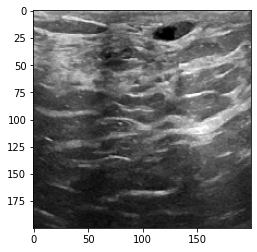

In [60]:
plt.imshow(xtest[1])
plt.show()

**Prediction**

In [61]:
xtest,ytest = test_generator.next()
print(xtest.shape)
print(ytest.shape)
 
prediction = model.predict(
    xtest, batch_size=40, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False)


(32, 200, 200, 3)
(32, 3)


In [62]:
prediction

array([[8.20136189e-01, 1.58398657e-03, 1.78279772e-01],
       [6.63457990e-01, 1.33132607e-01, 2.03409389e-01],
       [7.54833937e-01, 5.07884761e-05, 2.45115265e-01],
       [9.04873788e-01, 9.43077654e-02, 8.18450644e-04],
       [4.44610091e-03, 3.30920360e-04, 9.95222986e-01],
       [5.75124741e-01, 3.64555150e-01, 6.03201054e-02],
       [2.50654161e-01, 1.22823916e-01, 6.26521885e-01],
       [3.97644863e-02, 9.58442271e-01, 1.79320923e-03],
       [7.57271126e-02, 7.17596617e-03, 9.17096972e-01],
       [5.75609386e-01, 5.73135391e-02, 3.67077082e-01],
       [4.77300100e-02, 3.42937678e-01, 6.09332323e-01],
       [9.96706069e-01, 2.85874400e-03, 4.35168098e-04],
       [7.54165649e-03, 9.92326796e-01, 1.31536814e-04],
       [9.91885900e-01, 7.46961683e-03, 6.44582848e-04],
       [1.91064947e-03, 9.97789025e-01, 3.00386047e-04],
       [1.97234079e-02, 9.76816833e-01, 3.45973391e-03],
       [3.50446492e-01, 1.58253774e-01, 4.91299689e-01],
       [4.78368789e-01, 2.12411

In [63]:
ytest

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

**Compare Prediction with actual**

In [64]:
# To check categories are represented by which binary values
train_generator.class_indices 

{'benign': 0, 'malignant': 1, 'normal': 2}

In [65]:
#@title Default title text
predictionoutput = np.concatenate((prediction, ytest), axis=1)

panda_df = pd.DataFrame(data = predictionoutput, 
                        columns = ["Pred_benign", "Pred_malignant", "Pred_normal", "A_benign", "A_malignant", "A_normal"])
print(panda_df)  

#output = pd.DataFrame((prediction, ytest), axis =1)
#output
#df = pd.DataFrame(data=[[prediction], [ytest]], columns=['prediction', 'ytest'])
#print(df)
#model.predict(np.expand_dims(x, axis=0))
#plt.imshow(xtest[1])                                                                   
#plt.show()

    Pred_benign  Pred_malignant   Pred_normal  A_benign  A_malignant  A_normal
0      0.820136    1.583987e-03  1.782798e-01       1.0          0.0       0.0
1      0.663458    1.331326e-01  2.034094e-01       0.0          0.0       1.0
2      0.754834    5.078848e-05  2.451153e-01       1.0          0.0       0.0
3      0.904874    9.430777e-02  8.184506e-04       0.0          1.0       0.0
4      0.004446    3.309204e-04  9.952230e-01       0.0          0.0       1.0
5      0.575125    3.645552e-01  6.032011e-02       0.0          1.0       0.0
6      0.250654    1.228239e-01  6.265219e-01       0.0          0.0       1.0
7      0.039764    9.584423e-01  1.793209e-03       0.0          1.0       0.0
8      0.075727    7.175966e-03  9.170970e-01       0.0          0.0       1.0
9      0.575609    5.731354e-02  3.670771e-01       1.0          0.0       0.0
10     0.047730    3.429377e-01  6.093323e-01       1.0          0.0       0.0
11     0.996706    2.858744e-03  4.351681e-04       

In [66]:
datas,labels = train_generator.next()
filenames = test_generator.filenames
#filenames